In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.notebook_repr_html', False)

plt.rcParams['figure.figsize'] = [10, 8]
act = pd.read_csv('OTg6QzA_activities.csv')
act.shape # 데이터 구조, 행열 크기 알아보기

(66281, 4)

In [ ]:
print(act.head())
print(act.tail())

                 timestamp   X   Y   Z
0  2022-01-01 00:01:40.363  33  76  56
1  2022-01-01 00:01:42.961  34  87  56
2  2022-01-01 00:01:45.562  25  89  47
3  2022-01-01 00:01:48.163  11  70  50
4  2022-01-01 00:02:08.864  33  72  58
                     timestamp   X    Y    Z
66276  2022-01-31 23:28:00.481 -91  143  136
66277  2022-01-31 23:28:41.683 -89  145  138
66278  2022-01-31 23:28:49.383 -93  138  137
66279  2022-01-31 23:32:36.426 -93  131  137
66280  2022-01-31 23:32:44.126 -91  129  138


In [99]:
act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66281 entries, 0 to 66280
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  66281 non-null  object
 1   X          66281 non-null  int64 
 2   Y          66281 non-null  int64 
 3   Z          66281 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 2.0+ MB


In [ ]:
X = act.X.to_numpy()
print(X)
Y = act.Y.to_numpy()
print(Y)

[ 33  34  25 ... -93 -93 -91]
[ 76  87  89 ... 138 131 129]


In [ ]:

time = act.timestamp.to_numpy()
print("중앙:", time[33140]) #중앙값 시간: 1시 36분
print("처음:", time[1])
print("끝:", time[-1])

중앙: 2022-01-16 01:36:12.556
처음: 2022-01-01 00:01:42.961
끝: 2022-01-31 23:32:44.126
2사분위: 2022-01-10 13:12:20.215
3사분위: 2022-01-21 05:52:15.789


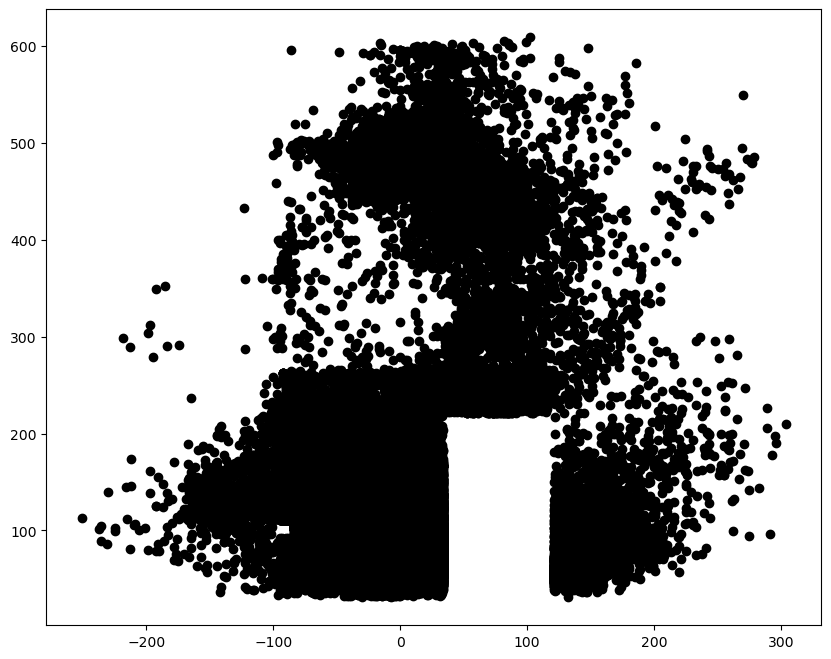

In [10]:
plt.style.use('grayscale') #흑백
plt.figure(facecolor='w') #배경색상 'white'

plt.scatter(X, Y) #스캐터플롯 그리기
plt.show()

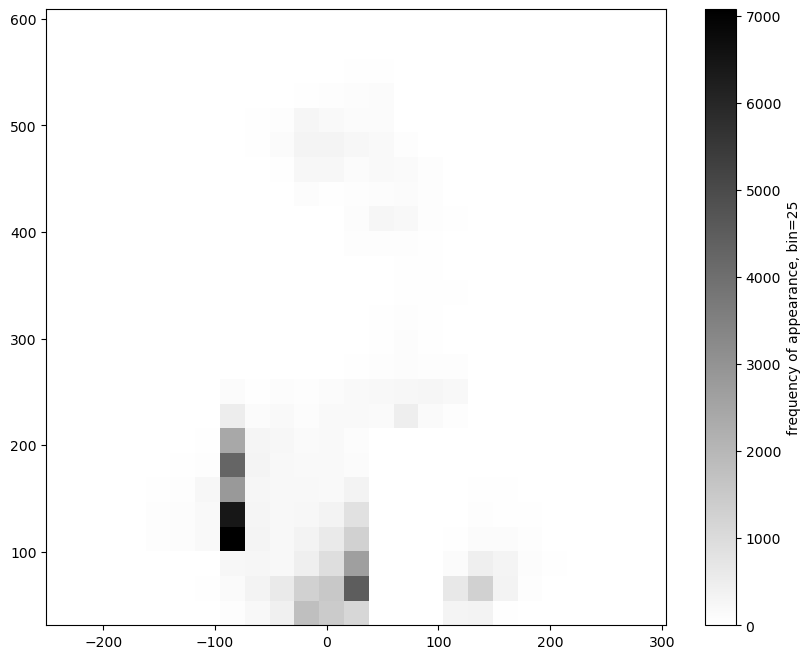

In [ ]:
#2d 히스토그램 그리기
plt.figure(facecolor='w')
plt.hist2d(X, Y, bins=(25,25), cmap = plt.cm.gray_r) #bin = x,y차원의 크기(25*25개의 bin); cmap=스칼라 데이터 매핑에 사용되는 색상

#컬러 범위 추가, 이름 추가
cb = plt.colorbar()
cb.set_label('frequency of appearance, bin=25') #히스토그램의 빈(bin) 크기

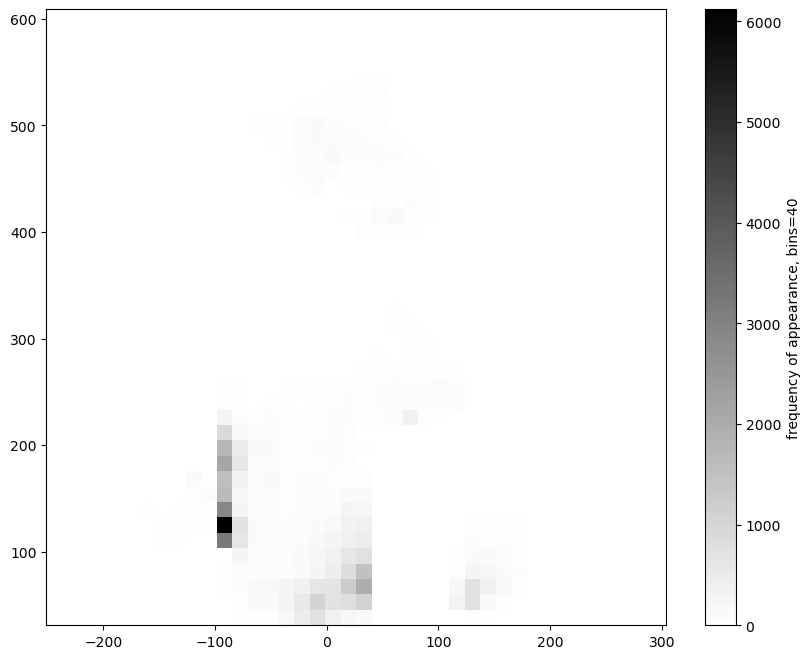

In [35]:
plt.figure(facecolor='white')
plt.hist2d(X, Y, bins=(40,40), cmap=plt.cm.gray_r)
cb = plt.colorbar()
cb.set_label('frequency of appearance, bins=40')

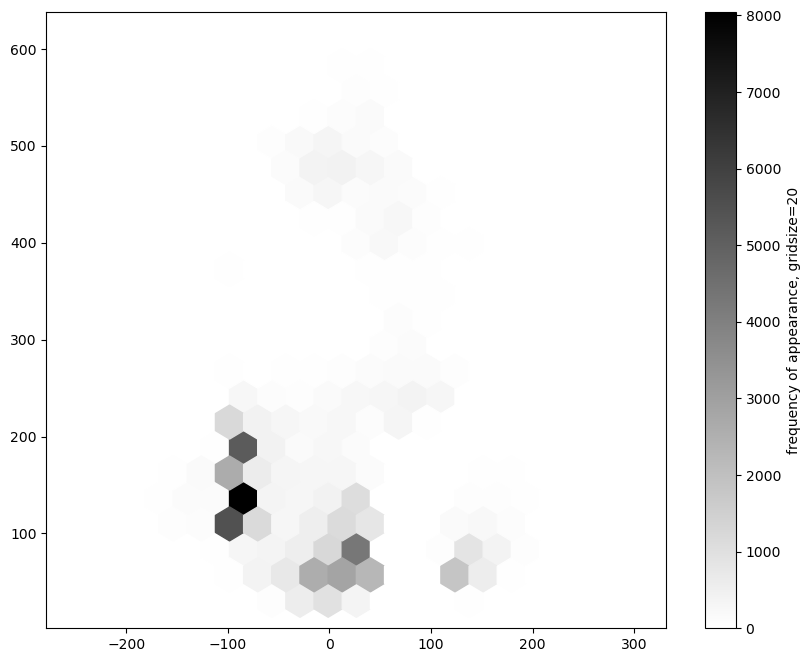

In [ ]:
#헥사빈 플롯: 육각형 그리드로 시각화
plt.figure(facecolor='white')
plt.hexbin(X, Y, gridsize=20, cmap=plt.cm.gray_r) #gridsize= 그리드 크기
cb = plt.colorbar()
cb.set_label('frequency of appearance, gridsize=20')  

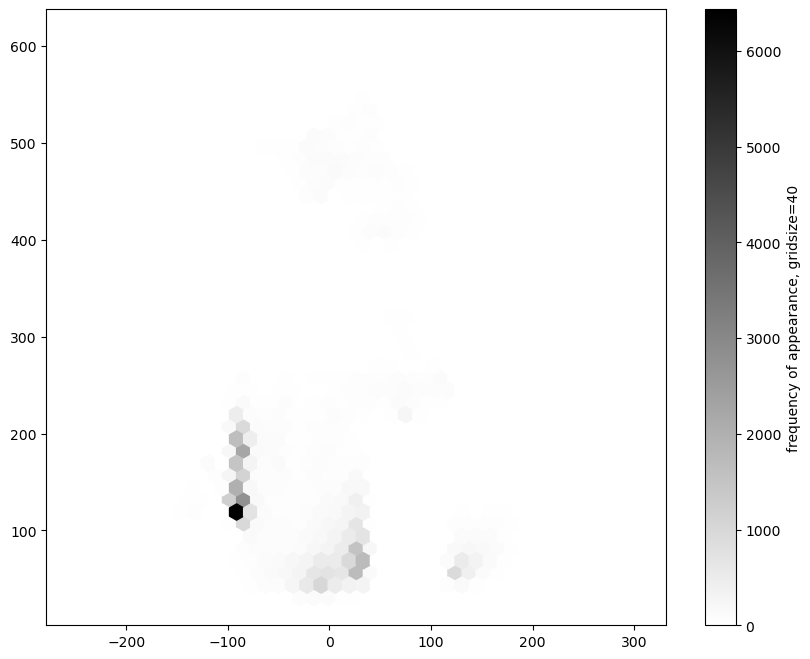

In [43]:
plt.figure(facecolor='white')
plt.hexbin(X, Y, gridsize=40, cmap=plt.cm.gray_r) #gridsize= 그리드 크기
cb = plt.colorbar()
cb.set_label('frequency of appearance, gridsize=40')  

# 4등분

In [45]:
x1 = X[:16570]
x2 = X[16570:16570*2]
x3 = X[16570*2:16570*3]
x4 = X[16570*3:]

y1 = Y[:16570]
y2 = Y[16570:16570*2]
y3 = Y[16570*2:16570*3]
y4 = Y[16570*3:]

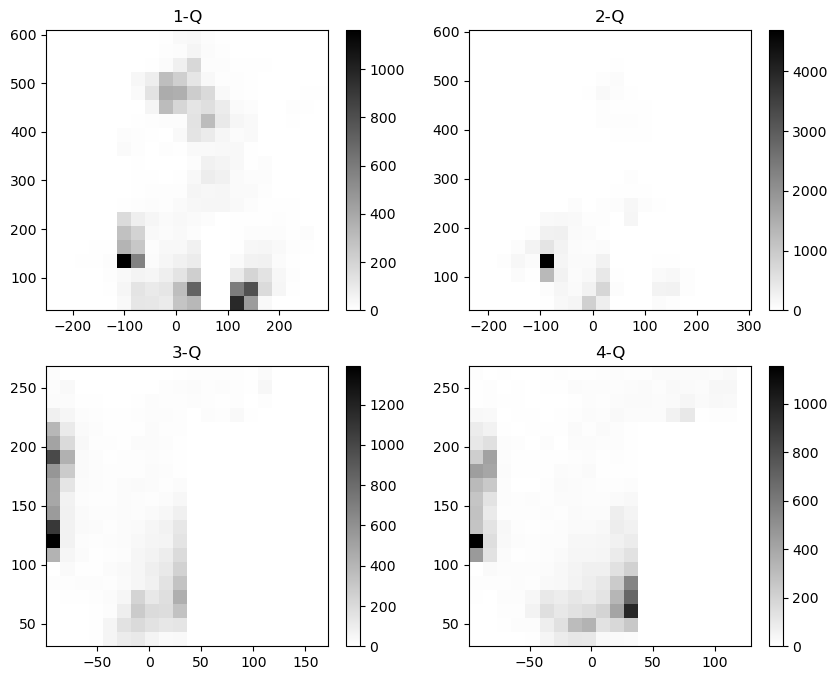

In [46]:
plt.figure(facecolor='white')

# 1등분
plt.subplot(2,2,1)  #subplot(행수, 열수, 위치)
plt.hist2d(x1, y1, bins=20, cmap=plt.cm.gray_r)
plt.title('1-Q')
plt.colorbar()

# 2등분
plt.subplot(2,2,2)
plt.hist2d(x2, y2, bins=20, cmap=plt.cm.gray_r)
plt.title('2-Q')
plt.colorbar()

# 3등분
plt.subplot(2,2,3)
plt.hist2d(x3, y3, bins=20, cmap=plt.cm.gray_r)
plt.title('3-Q')
plt.colorbar()

# 4등분
plt.subplot(2,2,4)
plt.hist2d(x4, y4, bins=20, cmap=plt.cm.gray_r)
plt.title('4-Q')
plt.colorbar()

plt.show()

[  0   0   0 ... -93 -93 -91] [ 33  34  25 ... -93 -93 -91]
[473 473 473 ... 138 131 129] [ 76  87  89 ... 138 131 129]


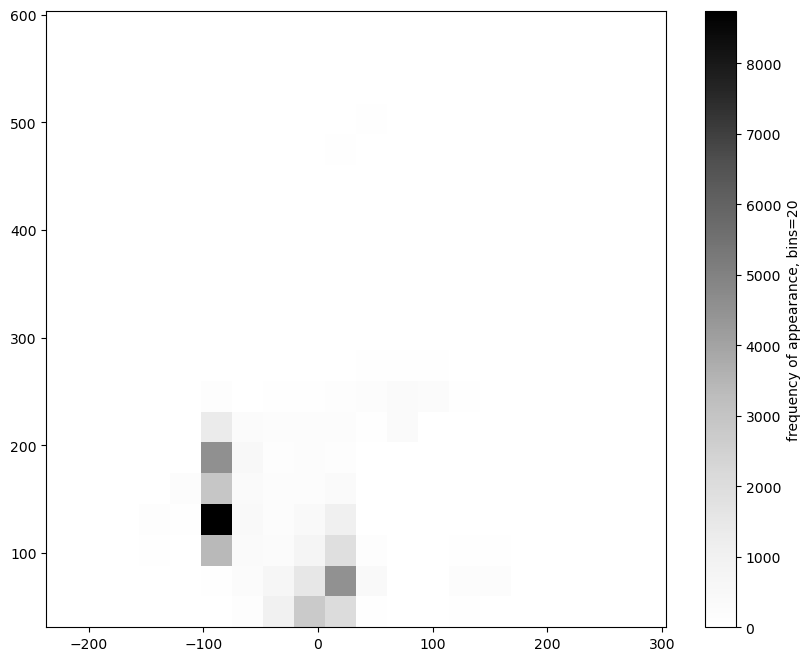

In [ ]:
#1등분 제외
plt.figure(facecolor='white')

X_dash = X[16570:]
Y_dash = Y[16570:]
print(X_dash, X)
print(Y_dash, Y)

plt.hist2d(X_dash, Y_dash, bins=20, cmap=plt.cm.Greys)
cb = plt.colorbar()
cb.set_label('frequency of appearance, bins=20')

Text(0.5, 1.0, '4-Q')

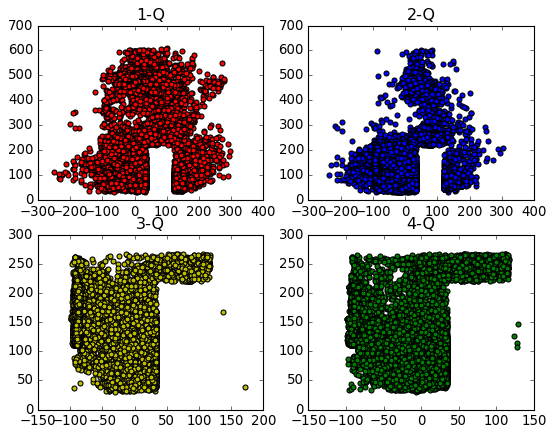

In [73]:
plt.style.use('classic')
plt.figure(facecolor='w')

plt.subplot(2,2,1)
plt.scatter(x1, y1, c="r", s=20)
plt.title('1-Q')

plt.subplot(2,2,2)
plt.scatter(x2, y2, c="b", s=20)
plt.title('2-Q')

plt.subplot(2,2,3)
plt.scatter(x3, y3, c="y", s=20)
plt.title('3-Q')

plt.subplot(2,2,4)
plt.scatter(x4, y4, c="g", s=20)
plt.title('4-Q')

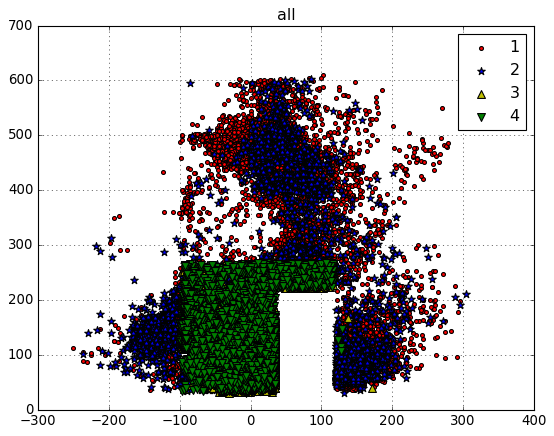

In [103]:
plt.style.use('classic')
plt.figure(facecolor='w')

plt.scatter(x1, y1, c="r", s=50, marker=".", label = "1")
plt.scatter(x2, y2, c="b", s=50, marker="*", label = "2")
plt.scatter(x3, y3, c="y", s=50, marker="^", label = "3")
plt.scatter(x4, y4, c="g", s=50, marker="v", label = "4")
plt.title('all')
plt.grid()
plt.legend(scatterpoints=1)


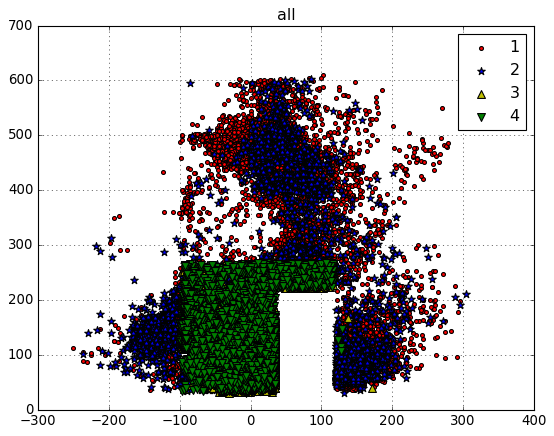

In [105]:
plt.style.use('classic')
plt.figure(facecolor='w')

plt.scatter(x1, y1, c="r", s=50, marker=".", label = "1")
plt.scatter(x2, y2, c="b", s=50, marker="*", label = "2")
plt.scatter(x3, y3, c="y", s=50, marker="^", label = "3")
plt.scatter(x4, y4, c="g", s=50, marker="v", label = "4")
plt.title('all');plt.grid();plt.legend(scatterpoints=1)



In [ ]:
help(plt.scatter)